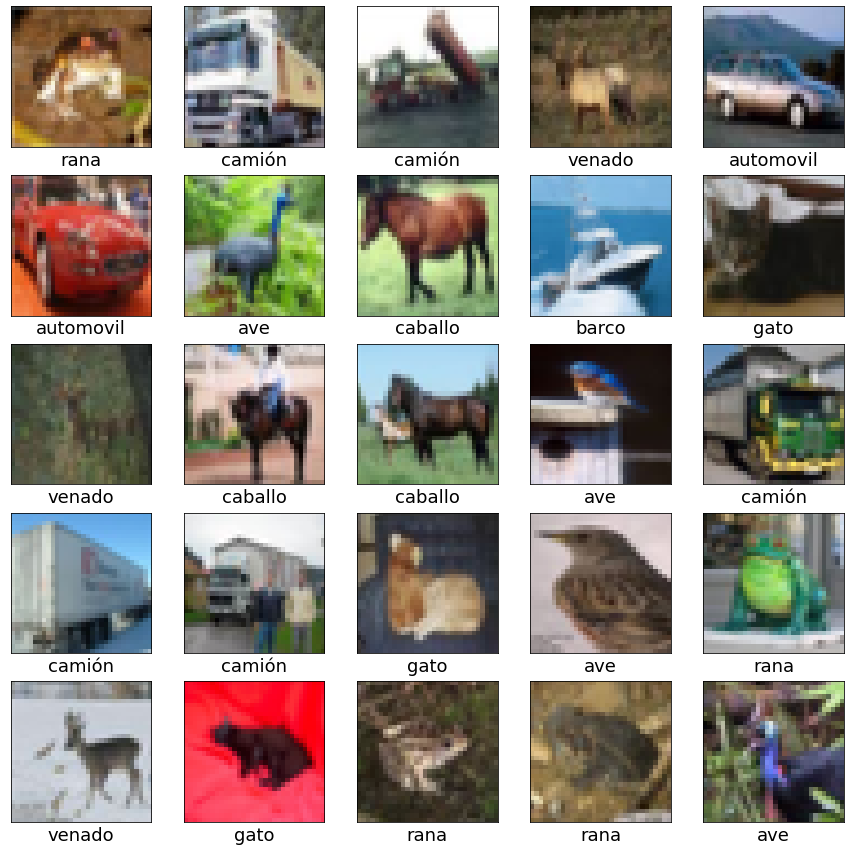

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 316s 200ms/step - loss: 1.4449 - accuracy: 0.4751 - val_loss: 1.0803 - val_accuracy: 0.6180
Epoch 2/5
1563/1563 [==============================] - 313s 200ms/step - loss: 1.0247 - accuracy: 0.6330 - val_loss: 0.8822 - val_accuracy: 0.6934
Epoch 3/5
1563/1563 [==============================] - 310s 198ms/step - loss: 0.8773 - accuracy: 0.6885 - val_loss: 0.8097 - val_accuracy: 0.7157
Epoch 4/5
1563/1563 [==============================] - 315s 201ms/step - loss: 0.7798 - accuracy: 0.7257 - val_loss: 0.7541 - val_accuracy: 0.7372
Epoch 5/5
1563/1563 [==============================] - 317s 203ms/step - loss: 0.7060 - accuracy: 0.7510 - val_loss: 0.7423 - val_accuracy: 0.7412
313/313 - 13s - loss: 0.7423 - accuracy: 0.7412 - 13s/epoch - 43ms/step
Eficiencia de clasificación de reconocimiento de imágenes: 74.11999702453613 %
INFO:tensorflow:Assets written to: /tmp/model7/assets
1/1 [==============================] - 0s 87ms/step - loss: 0.2764 - a

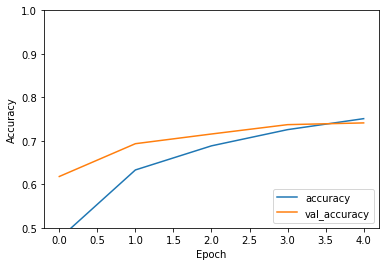

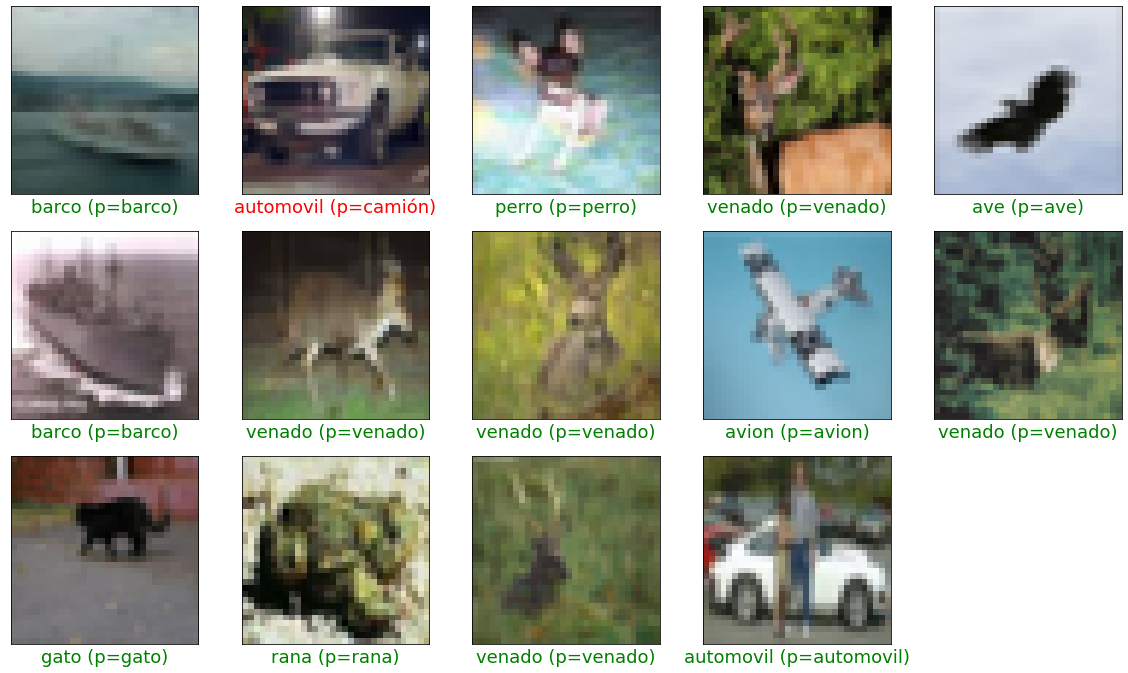

In [2]:
# Ejercicio basado en entrenamiento de imagenes a color de la base de datos 
# CIFAR 10 que contiene  imagenes de 10 diferentes tipos, dentro de las cuales se encuentran 
# imagenes de entrenamiento e imagenes de prueba.
# el codigo siguiente muestra el entrenamiento utilizando Tensorflow con Keras

# PARTE 1 

# Importación de los datos
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargado de datos
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Establecer nombres de clases (etiquetas) 
class_names = ['avion', 'automovil', 'ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Normalizar los valores de píxel para que estén entre 0 y 1
train_images=train_images.reshape(50000, 32, 32, 3)
train_images=train_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

# Modificando  el tamaño de las imágenes al momento de visualizarlas entre 2 y 2.5  veces
xSize = 20;
ySize = 20;
fontSize = 18;
numberOfImages = 14;
epochsNumber = 5;
testImageNumer = 25;

# Mostrar 25 imágenes ( ver 25 de 10000 imagenes de nuestra base de datos )
plt.figure(figsize=(xSize - 5, ySize - 5))
for i in range(testImageNumer): # Redimensión de la imagen
    plt.subplot(5,5,i+1)  # Creación de la grilla
    plt.xticks([]) # Posicionamiento de la imagen en el eje X
    plt.yticks([]) # Posicionamiento de la imagen en el eje Y
    plt.grid(False) # No mostrar las lineas de la grilla
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Superpones la imagen
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], fontsize=fontSize) # Colocación de etiqueta de texto con los datos de la imagen 
plt.show()

# Aqui se requiere incluir las convoluciones
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3])) # Primera capa 
model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu")) # Segunda capa 
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid')) # Capa de agrupación 
model.add(layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu")) # Tercera capa 
model.add(layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu")) # Cuarta capa 
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid')) # Capa de agrupación máxima
model.add(layers.Flatten()) # Capa de aplanamiento
model.add(layers.Dropout(0.5,noise_shape=None,seed=None)) # Capa de abandono 
model.add(layers.Dense(units=128,activation='relu')) # Agregar la primera capa densa completamente conectada
model.add(layers.Dense(units=10,activation='softmax')) # Capa de salida

model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochsNumber, 
                    validation_data=(test_images, test_labels))

# Creación de la gráfica lineal
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Creación de las variables para medir la eficacia del algoritmo y perdida de información
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("Eficiencia de clasificación de reconocimiento de imágenes: {}".format(test_acc * 100) + " %")

model.save('/tmp/model7')

#Parte 2 -Prueba con 15 imagenes aleatorias (incluir en otro cuadro de codigo despues de correr el primero)

import numpy as np
from random import randint, uniform,random

# Obtener un número aleatorio para crear el rango de imagenes que el algoritmo reconocerá más adelante
num_1 = randint(0,9985)
num_2 = num_1 + numberOfImages

# Crear el arreglo con el rango de imagenes aleatoriasobtenidas
arr = np.arange(num_1,num_2).reshape(numberOfImages)
permutation = np.random.permutation(arr) # Obtener las permutaciones del arreglo de imagenes para analizarlas
test_images1, test_labels1 = (test_images[permutation], test_labels[permutation]) # Obtención de las etiquetas de prueba de imagenes

predictions = model.predict(test_images1) # Variable de predicción de reconocimiento de la imagen
evaluations = model.evaluate(test_images1, test_labels1)  # Variable de evaluación de reconocimiento de la imagene

# Arreglo completo de información para las imagenes seleccionadas en el rango aleatorio
arreglo = (np.array(class_names)[np.argmax(predictions, axis=-1)].tolist())
color = 'red'

# Mostrar 14 imágenes con su respectiva clasificación.
plt.figure(figsize=(xSize,ySize)) # Redimensión de la imagen
for i in range(numberOfImages):
    plt.subplot(5,5,i+1) # Creación de la grilla
    plt.xticks([]) # Posicionamiento de la imagen en el eje X
    plt.yticks([]) # Posicionamiento de la imagen en el eje Y
    plt.grid(False) # No mostrar las lineas de la grilla
    plt.imshow(test_images1[i], cmap=plt.cm.binary) # Superpones la imagen
     
    if  (class_names[test_labels1[i][0]]).lower() == arreglo[i].lower(): # Comprobación de reconocimento de imagen correcto
       color ='green'
    else:
       color ='red'

    # Colocación de etiqueta de texto con los datos de la imagen correcta o incorrectamente reconocida
    plt.xlabel(class_names[test_labels1[i][0]]+" (p="+arreglo[i]+")", fontsize=fontSize).set_color(color)
    
plt.show()
